In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Analysis

In [39]:
cc_df = pd.read_csv("Consumer_Complaints.csv")
cc_df.head()

cc_df = cc_df.fillna(0)

### California has the most amount of complaints. Continuing on to visualize where most of the complaints are about.

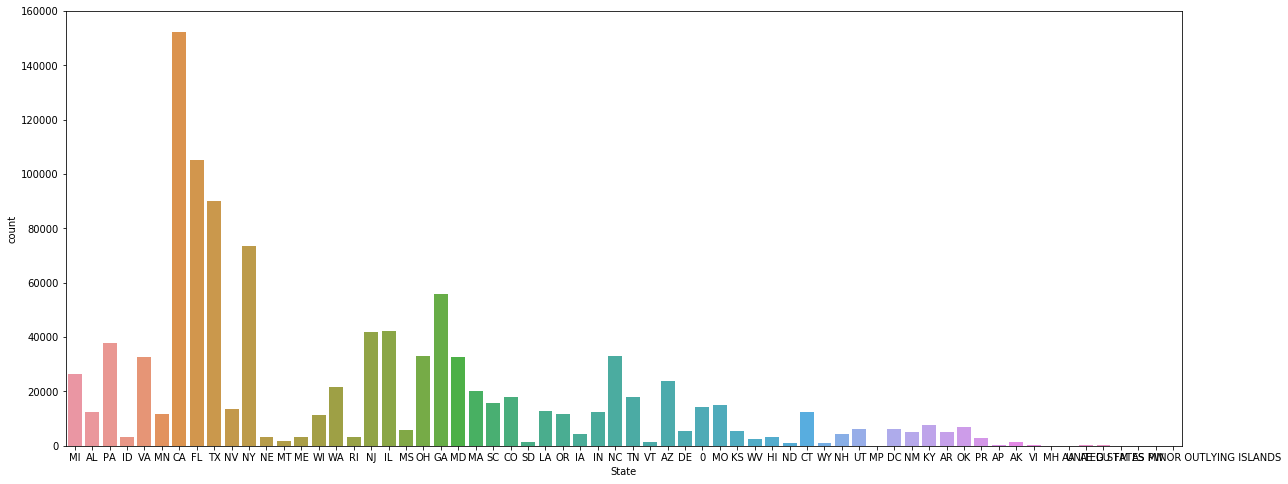

In [40]:
plt.figure(figsize=(20,8)) # this creates a figure 20 inch wide, 8 inch high
sns.countplot(x= cc_df["State"])
plt.show()

In [41]:
cali_cc = cc_df.loc[cc_df['State'] == "CA"]
cali_cc.head(1)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
6,06/16/2015,Debt collection,Medical,Improper contact or sharing of info,Contacted employer after asked not to,0,Company believes it acted appropriately as aut...,California Accounts Service,CA,92111,0,Consent not provided,Web,06/19/2015,Closed with explanation,Yes,No,1422680


In [42]:
cali_cc.count()

Date received                   152407
Product                         152407
Sub-product                     152407
Issue                           152407
Sub-issue                       152407
Consumer complaint narrative    152407
Company public response         152407
Company                         152407
State                           152407
ZIP code                        152407
Tags                            152407
Consumer consent provided?      152407
Submitted via                   152407
Date sent to company            152407
Company response to consumer    152407
Timely response?                152407
Consumer disputed?              152407
Complaint ID                    152407
dtype: int64

In [43]:
cali_cc.nunique()

Date received                     2441
Product                             17
Sub-product                         77
Issue                              161
Sub-issue                          210
Consumer complaint narrative     40747
Company public response             11
Company                           2118
State                                1
ZIP code                          2604
Tags                                 4
Consumer consent provided?           5
Submitted via                        6
Date sent to company              2354
Company response to consumer         9
Timely response?                     2
Consumer disputed?                   3
Complaint ID                    152407
dtype: int64

### Visualize the counts above

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

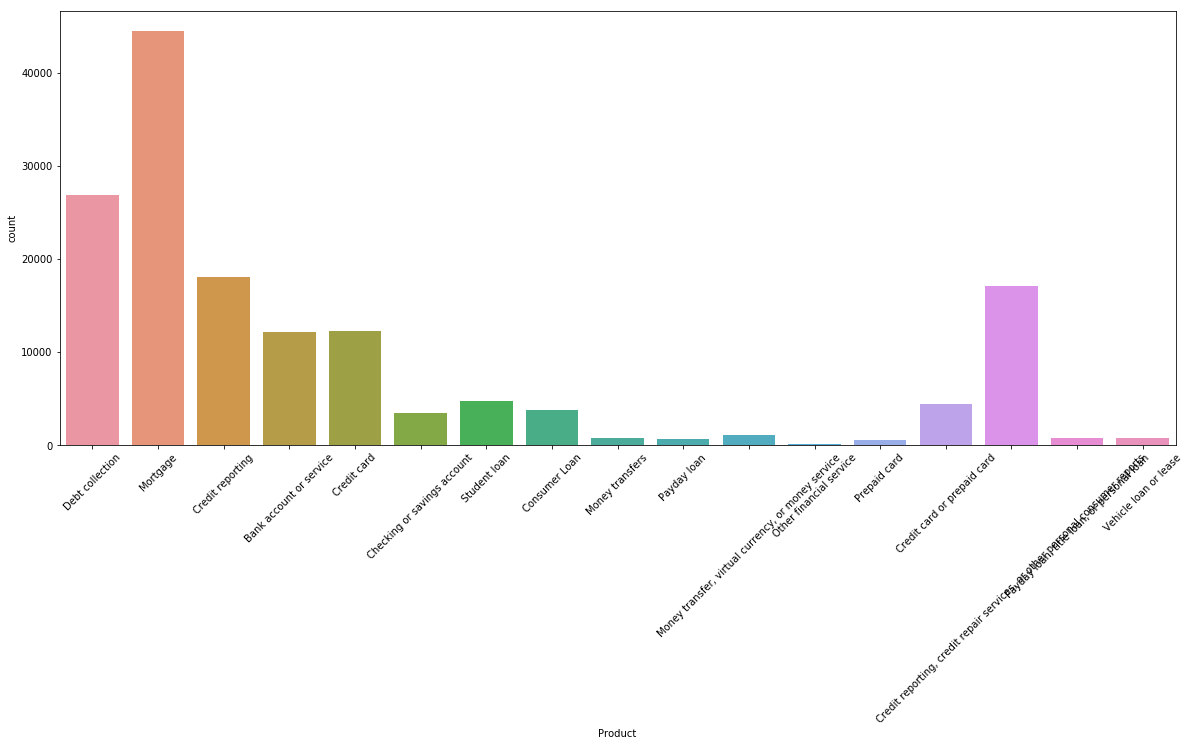

In [44]:
plt.figure(figsize=(20,8)) # this creates a figure 20 inch wide, 8 inch high
sns.countplot(x= cali_cc["Product"], data = cali_cc)
plt.xticks(rotation=45)

In [45]:
# Mortgages are the biggest number of complaints in California.

cali_mortgage = cali_cc.loc[cali_cc['Product'] == "Mortgage"]
cali_mortgage.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
8,11/13/2015,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",0,0,Company believes it acted appropriately as aut...,"Aldridge Pite, LLP",CA,93101,0,0,Referral,12/10/2015,Closed with explanation,Yes,Yes,1654890
10,04/14/2017,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",0,0,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",CA,90305,0,0,Referral,04/14/2017,Closed with explanation,Yes,No,2436165
22,03/08/2012,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",0,0,0,Ditech Financial LLC,CA,95361,0,0,Web,03/23/2012,Closed without relief,Yes,No,32412
29,04/27/2016,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",0,Mortgage was transferred to Nationstar as of X...,0,NATIONSTAR MORTGAGE,CA,954XX,0,Consent provided,Web,04/27/2016,Closed with explanation,Yes,Yes,1898476
33,03/31/2017,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",0,0,Company has responded to the consumer and the ...,"MUFG UNION BANK, NATIONAL ASSOCIATION",CA,92026,0,Consent not provided,Web,03/31/2017,Closed with explanation,Yes,No,2411860


In [46]:
cali_mortgage["Issue"].unique()

array(['Loan modification,collection,foreclosure',
       'Loan servicing, payments, escrow account',
       'Application, originator, mortgage broker',
       'Credit decision / Underwriting', 'Other',
       'Settlement process and costs', 'Applying for a mortgage',
       'Struggling to pay mortgage',
       'Incorrect information on your report',
       'Trouble during payment process',
       'Applying for a mortgage or refinancing an existing mortgage',
       'Closing on a mortgage',
       "Problem with a credit reporting company's investigation into an existing problem",
       'Credit monitoring or identity theft protection services',
       'Improper use of your report',
       'Problem with fraud alerts or security freezes',
       'Unable to get your credit report or credit score'], dtype=object)

### Linear Regression for the entire nation

### What type of complaint can be predicted for the future by looking at the Product  and if the Consumer was disputed.

In [47]:
cc_df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [59]:
data = cc_df.values
X = data[:, :1].reshape(-1, 1)
y = data[:, :15].reshape(-1, 1)

print(X.shape, y.shape)

(1094511, 1) (16417665, 1)


In [61]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(X)
encoded_y = label_encoder.transform(X)


label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: '<' not supported between instances of 'str' and 'int'

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

ValueError: Found input variables with inconsistent numbers of samples: [1094511, 16417665]